In [1]:
import edoxrd as xrd
import peakutils as pk
import edoxrd as xrd
import matplotlib.pyplot as plt
import numpy as np
import peakutils as pk

from scipy.signal import savgol_filter
from ipywidgets import interact, fixed
from imp import reload

%matplotlib inline

In [2]:
%ls /users/zatterin/Documents/data/XRD/2016/

e16006/  e16019/   e16037/  e16048/  e16052/  e16061/  e16089/  e16109/
e16014/  e16020/   e16043/  e16050/  e16054/  e16065/  e16090/  e16111/
e16018/  e16020E/  e16046/  e16051/  e16056/  e16088/  e16095/  e16122/


In [3]:
sample = 'e16089'
year = 2016
# d = '"C:\Users\zatterin\OneDrive - University College London\OneDrive Synced Docs\phd\data\XRD\"\\' + sample + '"\DteX"'
d = '/users/zatterin/Documents/data/XRD/{1}/{0}/'.format(sample, year)

In [4]:
files = !ls {d} | grep '.ras' #| grep '_00[1-9]' | grep '.ras'
for index, fname in enumerate(files): print('{0}...{1}'.format(index,fname))

0...e16089_01_rc_KTO_002.ras
1...e16089_02_t2t_001.ras
2...e16089_03_Y_PTO_001.ras
3...e16089_04_t2t_002.ras
4...e16089_05_phi_KTO_110.ras


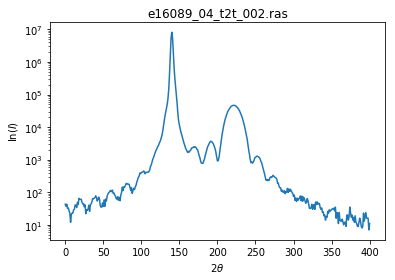

In [5]:
fname = files[3]
tt, i = xrd.read_data(d+fname)

plt.plot( i)
plt.yscale('log')
plt.xlabel(r'$2\theta$')
plt.ylabel(r'$\ln(I)$')
plt.title('{0}'.format(fname));

## Simulations

#### Estimate out-of-plane lattice parameter 

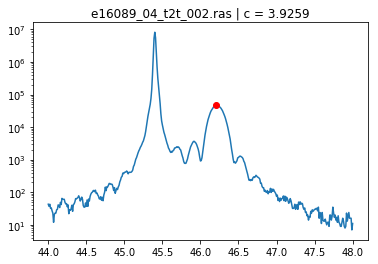

In [6]:
xdata, ydata = tt,i

# find peak indexes
idxs = pk.indexes(ydata, thres=1e-6, min_dist=10)

# find index of film peak and calc lattice param
film_peak = ydata[idxs].argsort()[::-1][1]
c = 2*(1/((2/1.5406) * np.sin(np.deg2rad(xdata[idxs][film_peak]/2))))
c =  np.round(c, decimals=4)

# plot it 
plt.plot(xdata,ydata)
plt.plot(xdata[idxs][film_peak],ydata[idxs][film_peak],'o',c='red'); plt.yscale('log')
plt.title('{1} | c = {0}'.format(c, fname));

#### Estimate thickness from Laue oscillations:

Select a suitable range:

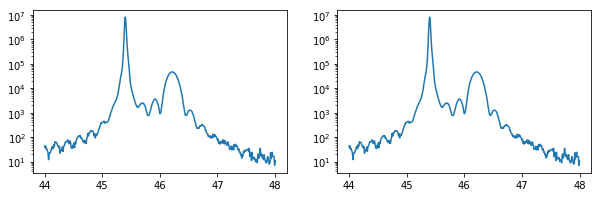

In [12]:
r = np.s_[:]
xdata, ydata = tt[r], i[r]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,3))

ax1.plot(tt, i)
ax1.set_yscale('log')
ax2.plot(xdata, ydata)
ax2.set_yscale('log')

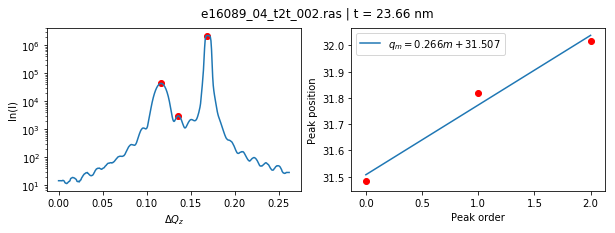

In [13]:
# smooth data and find peaks
ismooth = savgol_filter(ydata, 11, 0)
idx = pk.indexes(ismooth, thres=1e-3, min_dist=25)

# set the order of the peaks 
order = np.array(range(len(idx)))

# calc q pos for each peak
y = 4 * np.pi * np.sin(np.deg2rad(xdata/2)) / 1.5406
q = y[idx] * 10

# linear fit of the peaks pos
m, b = np.polyfit(order, q, 1)
t = np.round(abs(2 * np.pi / m), decimals=2)

# plot
fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].plot(abs(y-y.max()),ismooth)
ax[0].scatter(abs(y-y.max())[idx], ismooth[idx], c='r')
ax[0].set_yscale('log')
ax[0].set_xlabel(r'$\Delta Q_z$')
ax[0].set_ylabel(r'ln(I)')

ax[1].plot(order, order*m+b, label='$q_m = {0:.3f}m + {1:.3f}$'.format(m, b))
ax[1].scatter(order, q,c='r')
ax[1].legend()
ax[1].set_xlabel('Peak order')
ax[1].set_ylabel('Peak position')

fig.suptitle('{0} | t = {1} nm'.format(fname, t))
plt.show()

In [14]:
# t = xrd.calc_thickness(d+fname, threshold=1e-5, distance=15, side='l')

In [15]:
f = d+fname

In [23]:
@interact(sub='KTO', film='PTO', Nfilm=(0,600,0.1), c_film=(3.9, 4.2, 0.001), sc=(1e5,1e8,1e6),
         continuous_update=False, c_sub=(3.9, 4.2, 0.001))
def plt_ctr(sub, film, Nfilm=t/(0.1*c), c_film=c, sc=1e11, c_sub=4):
    # load and calc ctr data
    xdata, I = xrd.calc_ctr(f, sub, film, Nfilm, c_film, scale=sc, c_sub=c_sub)
    
    # plot
    plt.figure(figsize=(10,6))
    
    plt.plot(*xrd.read_data(f), label='Obs')
    plt.plot(xdata, I.real, label='Calc')
    plt.yscale('log')
    plt.ylabel(r'$I$ [cnts]')
    plt.xlabel(r'$2\theta$')
    plt.legend()
    
    plt.title('Film thickness: {0:.3f} nm \n Film out-of-plane parameter: {1:.3f} A \n Scale: {2}'\
              .format(Nfilm*c_film/10, c_film, sc), fontsize=9)

interactive(children=(Text(value='KTO', description='sub'), Text(value='PTO', description='film'), FloatSlider…

### Compare

In [ ]:
sample2 = 'e16014'

In [ ]:
d2 = "/Users/ezatterin/Documents/UCL_phd/data/XRD/"+sample2+"/"
files2 = !ls {d2} | grep '_00[1-9]' | grep '.ras'
for fname in files2: print fname
print len(files2)
for fname in files: print fname

In [ ]:
plt.plot(*xrd.read_data(files[2], d, comments='*'), label='{0}'.format(sample))
plt.plot(*xrd.read_data(files2[6], d2, comments='#'), label='{0}'.format(sample2))
plt.yscale('log')
plt.legend()